<a href="https://colab.research.google.com/github/javablack95/Machine-learning-for-finance/blob/master/Python_for_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection**
The data is downloadd from kaggle using the Kaggle api

In [1]:
# Install the Kaggle API client

!pip install -q kaggle

!apt-get install pv  >> /dev/null    # extract .tar file

# Upload Json File

import os

if not os.path.isfile('kaggle.json'):

  from google.colab import files

  files.upload()



Saving kaggle.json to kaggle.json


In [2]:
# The Kaggle API client expects this file to be in ~/.kaggle 

%%bash



mkdir -p ~/.kaggle

cp kaggle.json ~/.kaggle/

chmod 600 ~/.kaggle/kaggle.json  #  avoids a warning on Kaggle tool startup.


# Download the 500 company stock data
printf "S&P 500 stock data Dataset:\n\n"
kaggle datasets files camnugent/sandp500

printf "\nDownloading S&P 500 stock datasets..\n"
kaggle datasets download -d camnugent/sandp500

S&P 500 stock data Dataset:

name                       size  creationDate         
-------------------------  ----  -------------------  
all_stocks_5yr.csv         28MB  2018-02-10 03:13:43  
getSandP.py                 5KB  2018-02-10 03:15:32  
individual_stocks_5yr.zip  10MB  2018-02-10 03:13:02  
merge.sh                   190B  2018-02-10 03:14:05  




100%|##########| 19.2M/19.2M [00:00<00:00, 63.8MB/s]


In [3]:
!ls

kaggle.json  sample_data  sandp500.zip


In [4]:
!unzip sandp500.zip

Archive:  sandp500.zip
  inflating: merge.sh                
  inflating: individual_stocks_5yr.zip  
  inflating: getSandP.py             
  inflating: all_stocks_5yr.csv      


In [5]:
!ls

all_stocks_5yr.csv  individual_stocks_5yr.zip  merge.sh     sandp500.zip
getSandP.py	    kaggle.json		       sample_data


In [6]:
!unzip individual_stocks_5yr.zip

Archive:  individual_stocks_5yr.zip
   creating: individual_stocks_5yr/
  inflating: individual_stocks_5yr/XRX_data.csv  
  inflating: individual_stocks_5yr/GS_data.csv  
  inflating: individual_stocks_5yr/SPGI_data.csv  
  inflating: individual_stocks_5yr/MTB_data.csv  
  inflating: individual_stocks_5yr/V_data.csv  
  inflating: individual_stocks_5yr/CTAS_data.csv  
  inflating: individual_stocks_5yr/ESRX_data.csv  
  inflating: individual_stocks_5yr/APH_data.csv  
  inflating: individual_stocks_5yr/BBT_data.csv  
  inflating: individual_stocks_5yr/RHI_data.csv  
  inflating: individual_stocks_5yr/GGP_data.csv  
  inflating: individual_stocks_5yr/HCA_data.csv  
  inflating: individual_stocks_5yr/HD_data.csv  
  inflating: individual_stocks_5yr/PEP_data.csv  
  inflating: individual_stocks_5yr/INTC_data.csv  
  inflating: individual_stocks_5yr/MAC_data.csv  
  inflating: individual_stocks_5yr/CLX_data.csv  
  inflating: individual_stocks_5yr/UNP_data.csv  
  inflating: individual_stoc

In [7]:
!ls

all_stocks_5yr.csv     individual_stocks_5yr.zip  merge.sh
getSandP.py	       kaggle.json		  sample_data
individual_stocks_5yr  __MACOSX			  sandp500.zip


In [8]:
# change directory to the individual 500 csv files 
%cd individual_stocks_5yr/

/content/individual_stocks_5yr


In [0]:
#Ingest company's stock data
import pandas as pd
df = pd.read_csv('AAP_data.csv')

In [10]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP
1,2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP
2,2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP
3,2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP
4,2013-02-14,78.66,79.72,78.5850,78.84,1005376,AAP


In [11]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,116.24,118.8300,115.830,117.29,760629,AAP
1255,2018-02-02,115.92,117.1800,113.125,113.93,1092333,AAP
1256,2018-02-05,113.05,114.9700,109.810,109.86,1281592,AAP
1257,2018-02-06,108.28,113.1100,106.745,112.20,1240784,AAP
1258,2018-02-07,112.09,114.5799,109.900,109.93,2163545,AAP


In [12]:


# brief description of dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 68.9+ KB


In [0]:
#imports
import datetime as dt
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

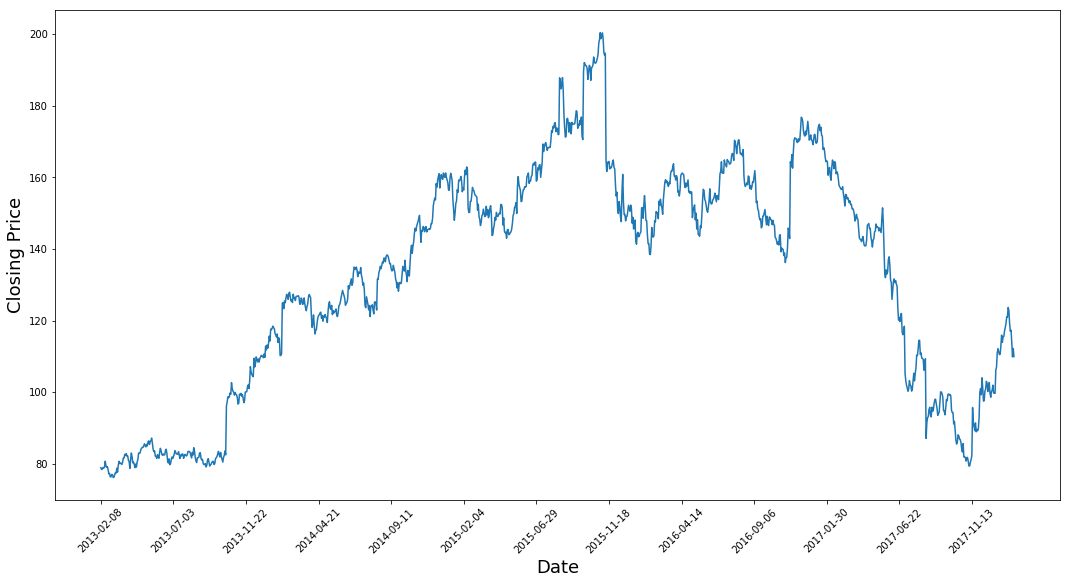

In [14]:
# plot the data
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]), df.close)
plt.xticks(range(0,df.shape[0], 100), df.date.loc[::100],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.show()

### **Feature** **engineering**

In [0]:

# Adding new columns based on values of existing columns
df['HL_PCT'] = (df['high'] - df['close']) / df['close'] * 100
df['PCT_change'] = (df['close'] - df['open']) / df['open'] * 100


In [0]:
# Selecting columns from dataframe that we perceive to be features.
df = df[['close', 'HL_PCT', 'PCT_change', 'volume']]

In [0]:
forecast_col = 'close'

In [18]:
df.isnull().any().sum()

0

In [19]:
df.head()

,close,HL_PCT,PCT_change,volume
0,78.90,1.039290,0.714833,1298137
1,78.39,0.663350,-0.330579,758016
2,78.60,0.038168,0.267891,876859
3,78.97,0.202609,0.088720,1038574
4,78.84,1.116185,0.228833,1005376


In [20]:
df.describe()

,close,HL_PCT,PCT_change,volume
count,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,132.433463,1.058576,0.003594,1.078043e+06
std,31.274463,0.971318,1.397287,1.019365e+06
min,76.180000,0.000000,-5.555556,1.307120e+05
25%,104.440000,0.366689,-0.749448,6.182010e+05
50%,141.300000,0.822876,-0.014895,8.491350e+05
75%,156.730000,1.460416,0.719552,1.219762e+06
max,200.380000,7.507289,9.230876,1.974952e+07


In [0]:
# Take a percentage of the length of dataset as number of days to shift label by.
forecast_out = int(math.ceil(0.01 * len(df)))

In [0]:
# Shift the value of label by the number of days determined by forecast_out.
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

In [0]:

# Selecting features.
X = np.array(df.drop(['label'], 1))



In [0]:
# Standardize our data center to the mean.
X = preprocessing.scale(X)
df.dropna(inplace=True)


In [0]:

# Selecting label
y = np.array(df['label'])


In [26]:
y

array([ 76.34,  76.37,  77.02, ..., 109.86, 112.2 , 109.93])

In [0]:

# This "shuffles" our data and returns 2 pairs of data sets whose members are connected.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)



In [0]:
# Selecting our Regressor
rg = LinearRegression()


In [0]:

# Train our Classifier using the training data
model =rg.fit(X_train, y_train)


In [0]:

# Generate predictions
y_preds = model.predict(X_test)


In [31]:

# model evaluation
rmse = (mean_squared_error(y_test,y_preds)) ** 0.5

print('The r2_score = {}'.format(r2_score(y_test,y_preds)))
print('The MSE = {}'.format(mean_squared_error(y_test,y_preds)))
print('The RMSE = {}'.format(rmse))

The r2_score = 0.930632157769162
The MSE = 63.25280486492791
The RMSE = 7.953163198685659
